In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
 # Load the test dataset
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
 # Load the train dataset
train_data = pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Display the column names in the dataset
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


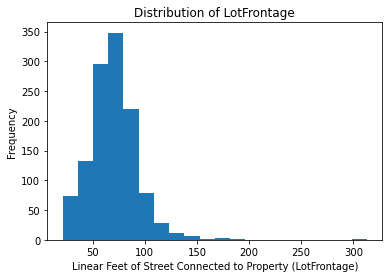

In [9]:
# Example: Create a histogram of the 'LotFrontage' column
plt.hist(train_data['LotFrontage'], bins=20)
plt.xlabel('Linear Feet of Street Connected to Property (LotFrontage)')
plt.ylabel('Frequency')
plt.title('Distribution of LotFrontage')
plt.show()

In [10]:
# Data Preprocessing
# Handle missing values by filling with appropriate values (customize as needed)
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['MasVnrArea'].fillna(0, inplace=True)

In [11]:
columns_with_missing_values = train_data.columns[train_data.isnull().any()]

# Impute missing values for numerical columns with the median
numerical_columns = train_data.select_dtypes(include=np.number)
numerical_columns_with_missing_values = numerical_columns.columns[numerical_columns.isnull().any()]
train_data[numerical_columns_with_missing_values] = train_data[numerical_columns_with_missing_values].fillna(train_data[numerical_columns_with_missing_values].median())

# Impute missing values for categorical columns with the mode (most frequent category)
categorical_columns = train_data.select_dtypes(exclude=np.number)
categorical_columns_with_missing_values = categorical_columns.columns[categorical_columns.isnull().any()]
train_data[categorical_columns_with_missing_values] = train_data[categorical_columns_with_missing_values].fillna(train_data[categorical_columns_with_missing_values].mode().iloc[0])

# Check if all missing values are filled
print(train_data.isnull().sum().sum())  # Should print 0 if all missing values are filled

0


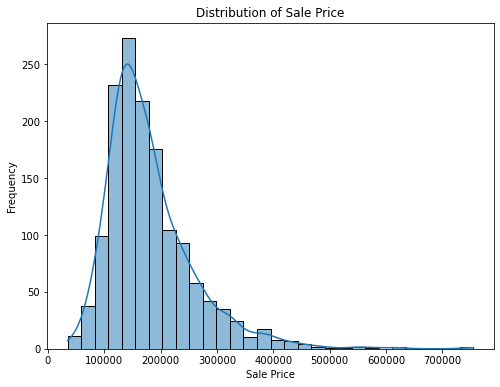

In [12]:
# Explore the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

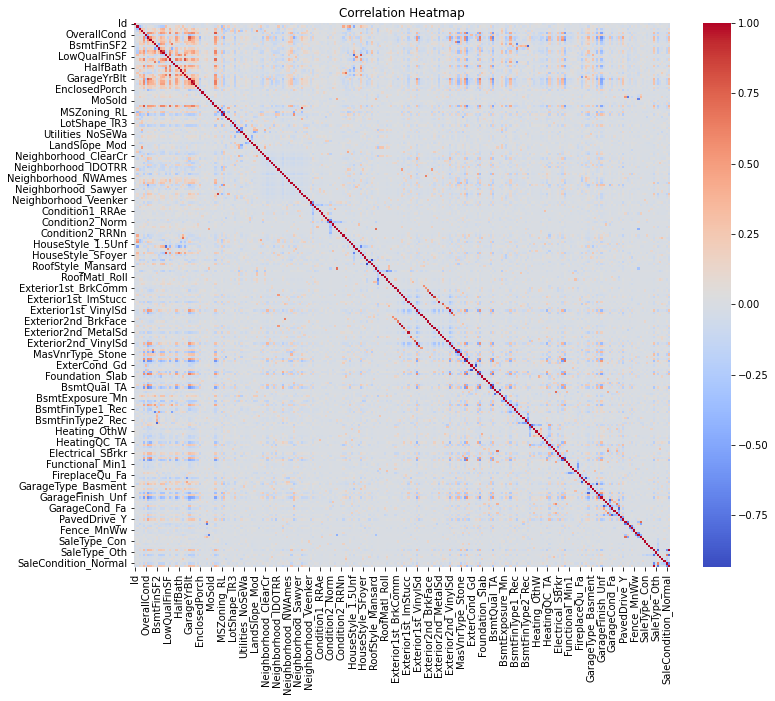

In [13]:
# Correlation heatmap
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Perform one-hot encoding
train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)

correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Feature engineering example (e.g., creating a 'TotalSF' feature)
train_data['TotalSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# Split the data into features (X) and target variable (y)
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred

array([ 159130.67527127,  348111.39425202,   86495.94022128,
        174416.55975239,  317114.64920964,   65731.66730238,
        234617.56536328,  146918.8961434 ,   57435.43972705,
        154442.27243856,  144866.07727696,  106695.38834609,
         80773.42773516,  219148.21226495,  174750.91196776,
        134489.72974817,  186957.33672577,  126347.37227072,
        128647.09388133,  215545.57832432,  147196.65833919,
        204547.81084504,  172157.87828894,  129201.17808361,
        198804.81326233,  136651.36777452,  192557.27476955,
        101043.39106399,  175607.66858274,  204553.46616771,
        169219.60597337,  276865.00164532,  238696.08127368,
        109706.8941707 ,  237677.12585451,  152900.10325579,
        128548.48102731,  202125.58762368,  309949.11981601,
        105547.62313565,  117255.23469493,  220296.23277512,
        102401.62405835,  369598.01584856,  129426.29849657,
        142155.45375583,   97715.27713174,  141165.43739805,
        425113.99673722,

In [18]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 20313.222873167353
R-squared (R2): 0.6567656296916459
